<h2>Part I: Preparation and Exploration</h2>
<br><h4>a) Imports and Loading the Dataset</h4>

1. Import the following packages:

2. Load the <strong>GOT_character_predictions.xlsx</strong> dataset

In [1]:
# importing libraries
import numpy as np  # mathematical essentials
import pandas as pd # data science essentials
import seaborn as sns # enhanced data viz
import matplotlib.pyplot as plt # data visualization
from sklearn.model_selection import train_test_split # training and testing
import statsmodels.formula.api as smf # linear modeling
import gender_guesser.detector as gender # guess gender based on (given) name
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer    
from six import StringIO           # saves objects in memory
from sklearn.tree import export_graphviz             # exports graphics
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# loading data
GOT = pd.read_excel('./GOT_character_predictions.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Initial Exploration of the Dataset</h3><br>

<h4>a)Number of observations (rows) and features (columns) present in the dataset

In [2]:
# pulling up data dictionary
GOT_description = pd.read_excel('./GOT_data_dictionary.xlsx')


# displaying the data dictionary
GOT_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


In [3]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {GOT.shape[0]}
Features:     {GOT.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     25



In [5]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b) Print the name of each column. Are there any column names that are confusing or any features that require more domain knowledge to understand what they mean?</h4>

In [6]:
# looping to print column names one by one
for column in GOT:
    print(column)

S.No
name
title
culture
dateOfBirth
mother
father
heir
house
spouse
book1_A_Game_Of_Thrones
book2_A_Clash_Of_Kings
book3_A_Storm_Of_Swords
book4_A_Feast_For_Crows
book5_A_Dance_with_Dragons
isAliveMother
isAliveFather
isAliveHeir
isAliveSpouse
isMarried
isNoble
age
numDeadRelations
popularity
isAlive


<h4>a) DESCRIBE each quantitative column using descriptive statistics. Round to two decimal places.</h4>

In [7]:
# descriptive statistics for numeric data
GOT.describe(include = 'number').round(2)

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.00,433.00,1946.0,1946.00,1946.00,1946.00,1946.00,21.00,26.00,23.00,276.00,1946.00,1946.00,433.00,1946.00,1946.00,1946.00
mean,973.50,1577.36,0.2,0.37,0.48,0.59,0.40,0.71,0.19,0.65,0.78,0.14,0.46,-1293.56,0.31,0.09,0.75
std,561.91,19565.41,0.4,0.48,0.50,0.49,0.49,0.46,0.40,0.49,0.42,0.35,0.50,19564.34,1.38,0.16,0.44
min,1.00,-28.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-298001.00,0.00,0.00,0.00
25%,487.25,240.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,18.00,0.00,0.01,0.00
50%,973.50,268.00,0.0,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,27.00,0.00,0.03,1.00
75%,1459.75,285.00,0.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,50.00,0.00,0.09,1.00
max,1946.00,298299.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,100.00,15.00,1.00,1.00


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II - Feature Engineering</h2>
<h4>a) Missing Value Detection</h4>
Explore the dataset for missing values using <strong>isnull( )</strong> and <strong>sum( )</strong>.

In [8]:
# checking each feature for missing values
GOT.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [9]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

In [10]:
# running the mv_flagger function
GOT = mv_flagger(df = GOT)


# checking results
GOT.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_title', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Display general information about each variable, including types and the number of non-missing values.</h4>

In [11]:
# we need to add a gender(male or female) column
# installing gender_guesser
%pip install gender_guesser

Note: you may need to restart the kernel to use updated packages.


In [12]:
# STEP 1: splitting first names from names

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in GOT.iterrows():
    
    # splitting name
    split_name = GOT.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
name_df = pd.DataFrame(placeholder_lst)


# displaying the results
name_df.head(n = 5)

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None


In [13]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
GOT = pd.read_excel('./GOT_character_predictions.xlsx')


# renaming column to concatenate
name_df.columns = ['first_name','0' ,'1', '2', '3', '4']


# concatenating personal_email_domain with friends DataFrame
GOT = pd.concat([GOT, name_df['first_name']],
                     axis = 1)

# printing value counts of personal_email_domain
GOT.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva


In [14]:
# STEP 1: Splitting names column

# placeholder list
placeholder_list = []

# looping over each email address
for index, col in GOT.iterrows():
    
    # splitting name
    split_names = GOT.loc[index, 'name'].split(sep = ' ', maxsplit = 1)
    
    # Appending placeholder_list with the results
    placeholder_list.append(split_names)
    
# converting placeholder_list into a DataFrame 
names_df = pd.DataFrame(placeholder_list)

# check DF
names_df

,0,1
0,Viserys,II Targaryen
1,Walder,Frey
2,Addison,Hill
3,Aemma,Arryn
4,Sylva,Santagar
...,...,...
1941,Luwin,None
1942,Reek,None
1943,Symeon,Star-Eyes
1944,Coldhands,None


In [15]:
# STEP 2: Adding First names to GOT DataFrame

# Rename name columns
names_df.columns = ['first_name' , 'other_names']

# Add first name colume to GOT DataFrame
GOT['first_name'] = names_df['first_name']


GOT.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva


In [16]:
# Commented out to make code run faster

## STEP 3: guessing gender based on (given) name

# placeholder list
#placeholder_list = []

# looping to guess gender
#for name in GOT["first_name"]:
#    guess = gender.Detector().get_gender(name)
#    placeholder_list.append(guess)

 # print results
#print(placeholder_list)

In [17]:
placeholder_list = ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male',
                    'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male',
                    'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy', 'unknown',
                    'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male', 'male',
                    'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown',
                    'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                    'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                    'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female', 
                    'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                    'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female',
                    'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown',
                    'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                    'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male',
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                    'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                    'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

In [18]:
# Add Gender to GOT DF
GOT['gender'] = pd.Series(placeholder_list)

 
GOT

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,first_name,gender
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,Viserys,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,Walder,unknown
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,Addison,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,Aemma,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,Sylva,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,NaN,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171,0,Luwin,unknown
1942,1943,Reek,NaN,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990,0,Reek,unknown
1943,1944,Symeon Star-Eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100,1,Symeon,male
1944,1945,Coldhands,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.130435,1,Coldhands,unknown


In [19]:
# CHECK unique values
GOT['gender'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: gender, dtype: int64

In [20]:
# Create dummy variables from Gender column
for index, col in GOT.iterrows():
    if GOT.loc[index, 'gender'] in ["male", "mostly_male"]:
        GOT.loc[index, 'male'] = 1
        GOT.loc[index, 'female'] = 0
    elif GOT.loc[index, 'gender'] in ["female", "mostly_female"]:
        GOT.loc[index, 'male'] = 0
        GOT.loc[index, 'female'] = 1
    else:
        GOT.loc[index, 'male'] = 0
        GOT.loc[index, 'female'] = 0
        
# Remove first name and gender columns
GOT = GOT.drop('first_name', axis = 1)
GOT = GOT.drop('gender', axis = 1)

# Convert male and female columns to int data type
GOT = GOT.astype({'male': int, 'female': int})


GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,female
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,1


In [21]:
# using median and mode
GOT['age'].fillna(GOT['age'].median(), inplace=True)
GOT['dateOfBirth'].fillna(GOT['dateOfBirth'].median(), inplace=True)
GOT['isAliveMother'].fillna(GOT['isAliveMother'].median(), inplace=True)
GOT['isAliveFather'].fillna(GOT['isAliveFather'].median(), inplace=True)
GOT['isAliveHeir'].fillna(GOT['isAliveHeir'].median(), inplace=True)
GOT['isAliveSpouse'].fillna(GOT['isAliveSpouse'].median(), inplace=True)
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 1946 non-null   float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [22]:
# House column
GOT['house'].value_counts()

# Fill missing values
GOT['house'].fillna(value = 'unknown', inplace = True)

# stratify houses
major_houses = ['Targaryen', 'Stark', 'Greyjoy', 'Baratheon',
'Tyrell', 'Martell', 'Lannister', 'Tully',
'Arryn', 'Others']

# Create dummy variables from house column
for index, col in GOT.iterrows():
    if major_houses[0] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[0]
        
    elif major_houses[1] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[1]
        
    elif major_houses[2] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[2]
        
    elif major_houses[3] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[3]
        
    elif major_houses[4] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[4]
        
    elif major_houses[5] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[5]
        
    elif major_houses[6] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[6]
        
    elif major_houses[7] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[7]
        
    elif major_houses[8] in GOT.loc[index, 'house']:
        GOT.loc[index, 'house'] = major_houses[8]
        
    else:
        GOT.loc[index, 'house'] = major_houses[9]

# Create dummy variables for house column 
GOT = pd.get_dummies(GOT, prefix = 'house', columns = ['house'])

# One column
GOT = GOT.drop('house_' + major_houses[9], axis = 1)

# GOT['house'].value_counts()
GOT.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,female,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,0,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,0,1,0,0,0,0,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0,0,0,0,0,0
5,6,Tommen Baratheon,NaN,NaN,268.0,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,0,0,0,0,0,1.0,1.0,1.0,1.0,0,0,27.0,5,1.000000,1,0,0,0,0,0,0,0,0,0,0,0
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,Kiera of Tyrosh,0,0,0,0,0,1.0,0.0,1.0,1.0,1,1,26.0,0,0.431438,0,0,0,0,0,0,0,0,0,1,0,0
7,8,Viserys I Targaryen,NaN,NaN,268.0,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,0,0,0,0,0,1.0,1.0,1.0,1.0,0,0,27.0,5,0.678930,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Wilbert,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,1,0,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.006689,0,1,0,0,0,0,0,0,0,0,0,0
9,10,Wilbert Osgrey,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,0,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.020067,1,1,0,0,0,0,0,0,0,0,0,0


In [23]:
GOT['mother'].fillna(value = 0, inplace = True)

#Create dummy variables from GOT column
for index, col in GOT.iterrows():
    if GOT.loc[index, 'mother'] == 0:
        GOT.loc[index, 'is_mother'] = 0

    else:
        GOT.loc[index, 'is_mother'] = 1
        
# Remove first name and gender columns
GOT = GOT.drop('mother', axis = 1)

# Convert male and female columns to int data type
GOT = GOT.astype({'is_mother': int})

GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,female,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,is_mother
0,1,Viserys II Targaryen,NaN,NaN,268.0,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0,0,0,0,0,0,0


In [24]:
GOT['father'].fillna(value = 0, inplace = True)

#Create dummy variables from GOT column
for index, col in GOT.iterrows():
    if GOT.loc[index, 'father'] == 0:
        GOT.loc[index, 'is_father'] = 0

    else:
        GOT.loc[index, 'is_father'] = 1
        
# Remove first name and gender columns
GOT = GOT.drop('father', axis = 1)

# Convert male and female columns to int data type
GOT = GOT.astype({'is_father': int})

GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,female,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,is_mother,is_father
0,1,Viserys II Targaryen,NaN,NaN,268.0,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [25]:
GOT['heir'].fillna(value = 0, inplace = True)

#Create dummy variables from GOT column
for index, col in GOT.iterrows():
    if GOT.loc[index, 'heir'] == 0:
        GOT.loc[index, 'is_heir'] = 0

    else:
        GOT.loc[index, 'is_heir'] = 1
        
# Remove first name and gender columns
GOT = GOT.drop('heir', axis = 1)

# Convert male and female columns to int data type
GOT = GOT.astype({'is_heir': int})

GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,female,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,is_mother,is_father,is_heir
0,1,Viserys II Targaryen,NaN,NaN,268.0,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Addison Hill,Ser,NaN,268.0,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
GOT['spouse'].fillna(value = 0, inplace = True)

#Create dummy variables from GOT column
for index, col in GOT.iterrows():
    if GOT.loc[index, 'spouse'] == 0:
        GOT.loc[index, 'is_spouse'] = 0

    else:
        GOT.loc[index, 'is_spouse'] = 1
        
# Remove first name and gender columns
GOT = GOT.drop('spouse', axis = 1)

# Convert male and female columns to int data type
GOT = GOT.astype({'is_spouse': int})

GOT.head(n = 5)

,S.No,name,title,culture,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male,female,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,is_mother,is_father,is_heir,is_spouse
0,1,Viserys II Targaryen,NaN,NaN,268.0,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,Addison Hill,Ser,NaN,268.0,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Initial Features Selection

### User Defined Function

In [27]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [28]:
        
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [29]:
# making a copy of GOT
GOT_complete = GOT.copy()

GOT_complete =  GOT.drop(['S.No', 'name', 'title', 'culture'],
                             axis = 1)

# preparing explanatory variable data
GOT_origin =  GOT.drop(['isAlive','S.No', 'name', 'title', 'culture'],
                             axis = 1)

# preparing response variable data
GOT_response = GOT.loc[ : , 'isAlive']


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            GOT_origin,
            GOT_response,
            test_size = 0.10,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1751, 30)
y-side: (1751,)


Testing Data
------------
X-side: (195, 30)
y-side: (195,)



In [30]:
# declaring set of x-variables
x_variables = GOT_origin

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

dateOfBirth +
book1_A_Game_Of_Thrones +
book2_A_Clash_Of_Kings +
book3_A_Storm_Of_Swords +
book4_A_Feast_For_Crows +
book5_A_Dance_with_Dragons +
isAliveMother +
isAliveFather +
isAliveHeir +
isAliveSpouse +
isMarried +
isNoble +
age +
numDeadRelations +
popularity +
male +
female +
house_Arryn +
house_Baratheon +
house_Greyjoy +
house_Lannister +
house_Martell +
house_Stark +
house_Targaryen +
house_Tully +
house_Tyrell +
is_mother +
is_father +
is_heir +
is_spouse +


In [31]:
# merging X_train and y_train so that they can be used in statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

### Standard Scaler

In [32]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with GOT_data
scaler.fit(GOT_origin)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(GOT_origin)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.0,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.06,-0.50,-0.77,-0.96,-1.20,-0.81,-17.98,-0.05,-15.56,-5.56,-0.41,-0.92,-32.24,-0.22,-0.56,-0.51,-0.28,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.10,-0.12,-0.11,-0.41
25%,-0.03,-0.50,-0.77,-0.96,-1.20,-0.81,0.06,-0.05,0.06,0.18,-0.41,-0.92,0.03,-0.22,-0.47,-0.51,-0.28,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.10,-0.12,-0.11,-0.41
50%,-0.03,-0.50,-0.77,-0.96,0.83,-0.81,0.06,-0.05,0.06,0.18,-0.41,-0.92,0.03,-0.22,-0.35,-0.51,-0.28,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.10,-0.12,-0.11,-0.41
75%,-0.03,-0.50,1.29,1.04,0.83,1.24,0.06,-0.05,0.06,0.18,-0.41,1.08,0.03,-0.22,-0.02,-0.51,-0.28,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.10,-0.12,-0.11,-0.41
max,32.24,2.01,1.29,1.04,0.83,1.24,0.06,19.70,0.06,0.18,2.46,1.08,0.04,10.62,5.67,1.95,3.51,10.98,8.59,6.82,6.10,7.99,5.1,5.51,12.70,7.18,9.57,8.59,9.14,2.46


In [33]:
# Uing Pearson's correlation the relationship between the response and 
#explanatory variables

df_corr = GOT_complete.corr(method ='pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
isAliveHeir                   0.11
isAliveSpouse                 0.08
isAliveMother                 0.07
house_Tyrell                  0.06
age                           0.05
female                        0.05
book5_A_Dance_with_Dragons    0.03
house_Martell                 0.03
book3_A_Storm_Of_Swords       0.01
house_Baratheon               0.01
male                         -0.00
house_Stark                  -0.02
house_Greyjoy                -0.03
house_Arryn                  -0.03
isAliveFather                -0.04
isNoble                      -0.04
house_Lannister              -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
is_spouse                    -0.05
house_Tully                  -0.06
book2_A_Clash_Of_Kings       -0.07
is_heir                      -0.13
is_mother                    -0.14
is_father                    -0.14
book1_A_Game_Of_Thrones      -0.15
house_Targaryen     

In [34]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_origin,
            GOT_response,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_response)


# merging training data for statsmodels
GOT_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [35]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 1946 non-null   float64
 5   book1_A_Game_Of_Thrones     1946 non-null   int64  
 6   book2_A_Clash_Of_Kings      1946 non-null   int64  
 7   book3_A_Storm_Of_Swords     1946 non-null   int64  
 8   book4_A_Feast_For_Crows     1946 non-null   int64  
 9   book5_A_Dance_with_Dragons  1946 non-null   int64  
 10  isAliveMother               1946 non-null   float64
 11  isAliveFather               1946 non-null   float64
 12  isAliveHeir                 1946 non-null   float64
 13  isAliveSpouse               1946 

## Logistic Regression 

In [36]:
# instantiating a logistic regression model object with the highest correlated
#variable
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows+
                                                    house_Martell+
                                                    male
                                                    
                                                    
                                                    
                                                    
                                            """ ,
                           data = GOT_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.534351
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1747
Method:                           MLE   Df Model:                            3
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                 0.05731
Time:                        19:16:16   Log-Likelihood:                -935.65
converged:                       True   LL-Null:                       -992.53
Covariance Type:            nonrobust   LLR p-value:                 1.692e-24
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.4662      0.081      5.763      0.000       0.308       0.625
book4_A_Feast_For_Crows     1.1799      0.115     10.262      0.000       0.955       1.405
house_Martell               0.4766      0.617      0.772      0.440      -0.734       1.687
male                       -0.0324      0.140     -0.231      0.817      -0.307       0.242
===========================================================================================
"""

### Base Logistic

In [37]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~dateOfBirth +
                                                    book1_A_Game_Of_Thrones +
                                                    book2_A_Clash_Of_Kings +
                                                    book3_A_Storm_Of_Swords +
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons +
                                                    isAliveMother +
                                                    isAliveFather +
                                                    isAliveHeir +
                                                    isAliveSpouse +
                                                    isMarried +
                                                    isNoble +
                                                    age +
                                                    numDeadRelations +
                                                    popularity +
                                                    male +
                                                    female +
                                                    house_Arryn +
                                                    house_Baratheon +
                                                    house_Greyjoy +
                                                    house_Lannister +
                                                    house_Martell +
                                                    house_Stark +
                                                    house_Targaryen +
                                                    house_Tully +
                                                    house_Tyrell +
                                                    is_mother +
                                                    is_father +
                                                    is_heir +
                                                    is_spouse""",
                                         data    = GOT_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.424132
         Iterations: 35


C:\Users\oreso\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1721
Method:                           MLE   Df Model:                           29
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.2518
Time:                        19:16:16   Log-Likelihood:                -742.66
converged:                      False   LL-Null:                       -992.53
Covariance Type:            nonrobust   LLR p-value:                 3.230e-87
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -82.5291   8835.614     -0.009      0.993   -1.74e+04    1.72e+04
dateOfBirth                    0.2154      0.028      7.655      0.000       0.160       0.271
book1_A_Game_Of_Thrones       -0.6786      0.169     -4.008      0.000      -1.010      -0.347
book2_A_Clash_Of_Kings        -0.6807      0.155     -4.396      0.000      -0.984      -0.377
book3_A_Storm_Of_Swords       -0.5484      0.157     -3.491      0.000      -0.856      -0.240
book4_A_Feast_For_Crows        1.4054      0.164      8.574      0.000       1.084       1.727
book5_A_Dance_with_Dragons    -0.1396      0.155     -0.899      0.369      -0.444       0.165
isAliveMother                  0.5275      1.582      0.333      0.739      -2.573       3.628
isAliveFather                 -0.1022      1.411     -0.072      0.942      -2.868       2.664
isAliveHeir                   19.4919   8835.610      0.002      0.998   -1.73e+04    1.73e+04
isAliveSpouse                  0.2427      0.487      0.499      0.618      -0.711       1.197
isMarried                      0.0898   1.81e+07   4.95e-09      1.000   -3.56e+07    3.56e+07
isNoble                        0.1224      0.140      0.878      0.380      -0.151       0.396
age                            0.2154      0.028      7.656      0.000       0.160       0.271
numDeadRelations              -0.0206      0.071     -0.288      0.773      -0.161       0.119
popularity                    -2.4346      0.606     -4.015      0.000      -3.623      -1.246
male                          -0.3290      0.161     -2.041      0.041      -0.645      -0.013
female                         0.1519      0.282      0.539      0.590      -0.400       0.704
house_Arryn                   -0.2797      0.670     -0.417      0.676      -1.593       1.034
house_Baratheon                0.5250      0.578      0.908      0.364      -0.608       1.658
house_Greyjoy                 -0.5046      0.401     -1.259      0.208      -1.290       0.281
house_Lannister               -0.4128      0.368     -1.122      0.262      -1.134       0.308
house_Martell                  0.0911      0.679      0.134      0.893      -1.239       1.421
house_Stark                    0.6803      0.334      2.034      0.042       0.025       1.336
house_Targaryen                0.5646      0.569      0.992      0.321      -0.551       1.680
house_Tully                   -1.4416      0.675     -2.136      0.033      -2.764      -0.119
house_Tyrell                   2.3391      1.032      2.266      0.023       0.315       4.363
is_mother                     -0.7238      1.333     -0.543      0.587      -3.336       1.888
is_father                     -0.1013      1.142     -0.089      0.929      -2.339       2.136
is_heir                        0.5051      1.144      0.442      0.659      -1.736       2.747
is_spouse                      0.0897   1.81e+07   4.94e-09      1.000   -3.56e+07    3.56e+07
===========

In [38]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~ book1_A_Game_Of_Thrones +
                                            book2_A_Clash_Of_Kings +
                                            book3_A_Storm_Of_Swords +
                                            book4_A_Feast_For_Crows +
                                            book5_A_Dance_with_Dragons +isAliveMother +
                                            isAliveFather +
                                            isAliveHeir +
                                            isAliveSpouse +
                                            isNoble +
                                            age +
                                            popularity +
                                            male +
                                            female +
                                            house_Arryn +
                                            house_Baratheon +
                                            house_Greyjoy +
                                            house_Martell +
                                            house_Stark +
                                            house_Targaryen +
                                            house_Tully +
                                            house_Tyrell +
                                            is_father""",
                                            data    = GOT_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

         Current function value: 0.486754
         Iterations: 35


C:\Users\oreso\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1727
Method:                           MLE   Df Model:                           23
Date:                Sun, 05 Dec 2021   Pseudo R-squ.:                  0.1413
Time:                        19:16:16   Log-Likelihood:                -852.31
converged:                      False   LL-Null:                       -992.53
Covariance Type:            nonrobust   LLR p-value:                 3.981e-46
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -21.4423   1.87e+04     -0.001      0.999   -3.67e+04    3.66e+04
book1_A_Game_Of_Thrones       -0.5775      0.160     -3.601      0.000      -0.892      -0.263
book2_A_Clash_Of_Kings        -0.3658      0.147     -2.487      0.013      -0.654      -0.077
book3_A_Storm_Of_Swords       -0.3426      0.148     -2.312      0.021      -0.633      -0.052
book4_A_Feast_For_Crows        1.5754      0.152     10.390      0.000       1.278       1.873
book5_A_Dance_with_Dragons    -0.0544      0.144     -0.379      0.705      -0.336       0.227
isAliveMother                  0.6882      1.340      0.514      0.607      -1.938       3.314
isAliveFather                  0.1763      1.221      0.144      0.885      -2.217       2.569
isAliveHeir                   21.0517   1.87e+04      0.001      0.999   -3.66e+04    3.67e+04
isAliveSpouse                  0.7307      0.327      2.235      0.025       0.090       1.371
isNoble                       -0.1100      0.128     -0.859      0.390      -0.361       0.141
age                         1.919e-05   5.48e-05      0.350      0.726   -8.82e-05       0.000
popularity                    -1.6369      0.435     -3.767      0.000      -2.488      -0.785
male                          -0.2215      0.152     -1.460      0.144      -0.519       0.076
female                         0.2311      0.250      0.925      0.355      -0.259       0.721
house_Arryn                   -0.3825      0.616     -0.621      0.534      -1.589       0.824
house_Baratheon                0.5552      0.546      1.017      0.309      -0.515       1.625
house_Greyjoy                 -0.5829      0.387     -1.505      0.132      -1.342       0.176
house_Martell                  0.6361      0.651      0.977      0.329      -0.640       1.913
house_Stark                    0.6910      0.329      2.100      0.036       0.046       1.336
house_Targaryen               -1.2325      0.313     -3.943      0.000      -1.845      -0.620
house_Tully                   -0.8516      0.644     -1.321      0.186      -2.115       0.412
house_Tyrell                   2.5238      1.051      2.402      0.016       0.464       4.583
is_father                     -0.6340      0.788     -0.805      0.421      -2.178       0.910
==============================================================================================
"""

#### Candidate Dictionary

In [39]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full' : [ 'dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried',
                   'isNoble', 'age', 'numDeadRelations', 'popularity', 'male', 'female',
                   'house_Arryn', 'house_Baratheon', 'house_Greyjoy', 'house_Lannister',
                   'house_Martell', 'house_Stark', 'house_Targaryen', 'house_Tully', 'house_Tyrell',
                   'is_mother', 'is_father', 'is_heir', 'is_spouse'],
 

 # significant variables only (set 1)
 'logit_sig'  : ['book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried',
                   'isNoble', 'age', 'numDeadRelations', 'popularity', 'male', 'female',
                   'house_Arryn', 'house_Baratheon', 'house_Greyjoy', 'house_Lannister'],
    
    
 # significant variables only (set 2)
'logit_sig_2'  : ['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir'], 
                
#other variables
'x_variables'   : [ 'dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons',
                   'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried',
                   'isNoble', 'age', 'numDeadRelations', 'popularity', 'male', 'female',
                   'house_Arryn', 'house_Baratheon', 'house_Greyjoy', 'house_Lannister',
                   'house_Martell', 'house_Stark', 'house_Targaryen', 'house_Tully', 'house_Tyrell',
                   'is_mother', 'is_father', 'is_heir', 'is_spouse']
                   
}

In [40]:
# train/test split with the significant model
GOT_origin   =  GOT.loc[ : , candidate_dict['logit_sig_2']]
GOT_response =  GOT.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_origin,
            GOT_response,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_response)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('logreg Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)



Training ACCURACY: 0.7527
Testing  ACCURACY: 0.8
logreg Train-Test Gap : 0.0473


#### Confusion Matrix

In [41]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 12  38]
 [  1 144]]


In [42]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 12
False Positives: 38
False Negatives: 1
True Positives : 144



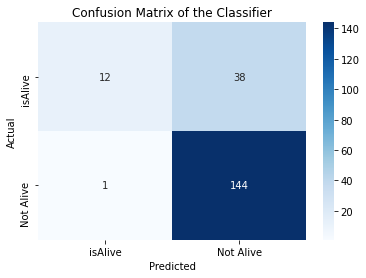

In [43]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['isAlive', 'Not Alive'])

#### AUC Score

In [44]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6166


In [45]:
# zipping each feature name to its coefficient
logreg_model_values = zip(GOT[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', 0.26)
('dateOfBirth', -0.0)
('book1_A_Game_Of_Thrones', -0.67)
('book2_A_Clash_Of_Kings', -0.56)
('book3_A_Storm_Of_Swords', -0.18)
('book4_A_Feast_For_Crows', 1.29)
('book5_A_Dance_with_Dragons', -0.02)
('isAliveMother', 0.3)
('isAliveFather', -0.02)
('isAliveHeir', 0.33)


### Tuned Logistic 

In [46]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))

# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7527
Testing  ACCURACY: 0.8
AUC Score        : 0.6166


In [ ]:
# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(rf_default_train - rf_default_test).round(4))
rf_default_test_gap = abs(rf_default_train - rf_default_test).round(4)

#### RandomizedSearchCV 

In [47]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 250)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 50,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(GOT_origin, GOT_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

<ipython-input-47-26c000e471c2>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)
C:\Users\oreso\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oreso\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oreso\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\oreso\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not co

Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.0000000000000004}
Tuned CV AUC      : 0.5846


In [48]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=3.0000000000000004, max_iter=250, random_state=219,
                   solver='newton-cg', warm_start=True)

In [49]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7619
Testing  ACCURACY: 0.8051
AUC Score        : 0.6266


In [50]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 1
True Positives : 144



In [51]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}    {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_tuned_auc}        {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR'],
           
    'AUC Score'     : [logreg_auc_score, lr_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6166    (12, 38, 1, 144)
Tuned LR      0.6266        (13, 37, 1, 144)




In [52]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6166,0.7527,0.8000,"(12, 38, 1, 144)"
1,Tuned LR,0.6266,0.7619,0.8051,"(13, 37, 1, 144)"
2,Tuned LR,0.6266,0.7619,0.8051,"(13, 37, 1, 144)"


## Display Tree

In [53]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

### Full Tree

In [54]:
# train/test split with the Full model
GOT_origin   =  GOT.loc[ : , candidate_dict['logit_sig_2']]
GOT_response =  GOT.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_origin,
            GOT_response,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_response)


In [55]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Full Tree Train-Test Gap :', abs(full_tree_train_score - full_tree_test_score).round(4))
full_tree_test_gap = abs(full_tree_train_score - full_tree_test_score).round(4)

# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8327
Full Tree Testing ACCURACY : 0.8256
Full Tree AUC Score: 0.7124
Full Tree Train-Test Gap : 0.0071


In [56]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 8
True Positives : 137



### Pruned Tree

In [57]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 5,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('Pruned Tree Train-Test Gap :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

Training ACCURACY: 0.7915
Testing  ACCURACY: 0.8308
AUC Score        : 0.7224
Pruned Tree Train-Test Gap : 0.0393


In [58]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 8
True Positives : 137



<ipython-input-28-141a9830ad1b>:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


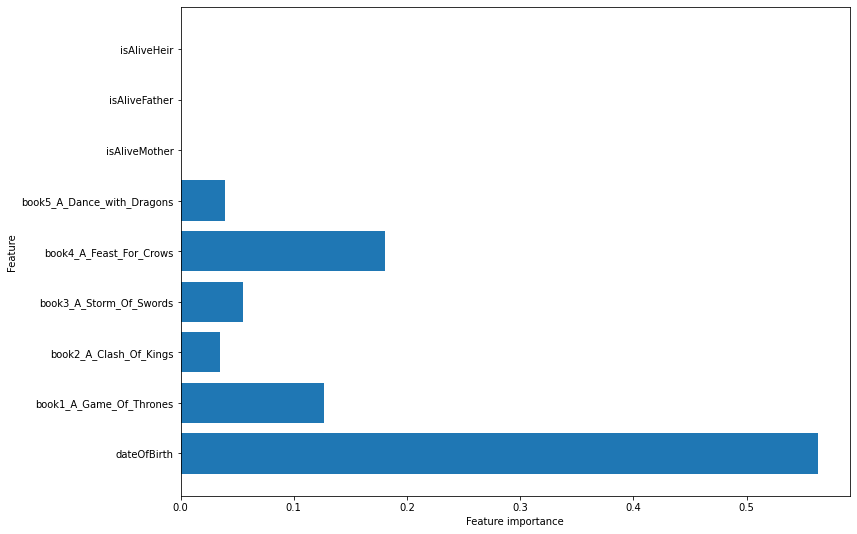

In [59]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train  = x_train,
                         export = False)

In [60]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_auc}                    {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree     {full_tree_auc_score}       {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}     {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR','Full Tree', 'Pruned Tree'],
           
    'AUC Score'     : [logreg_auc_score, lr_auc, full_tree_auc_score, 
                       pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, lr_train_acc, full_tree_train_score,
                           pruned_tree_train_score ],
           
    'Testing Accuracy'  : [logreg_test_score, lr_test_acc, full_tree_test_score,
                           pruned_tree_test_score, ],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6166         (12, 38, 1, 144)
Tuned LR      0.6266                    (13, 37, 1, 144)
Full Tree     0.7124       (24, 26, 8, 137)
Pruned Tree   0.7224     (25, 25, 8, 137)




### Tuned Tree

In [61]:
# declaring a hyperparameter space
criterion_space = ['gini']
splitter_space  = ['random']
depth_space     = pd.np.arange(7)
leaf_space      = pd.np.arange(1, 31, 3)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 150,
                                   n_jobs                = -1,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(GOT_origin, GOT_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

<ipython-input-61-1fccdf6d40d6>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(7)
<ipython-input-61-1fccdf6d40d6>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 31, 3)
C:\Users\oreso\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 70 is smaller than n_iter=150. Running 70 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 13, 'max_depth': 6, 'criterion': 'gini'}
Tuned Training AUC: 0.611


C:\Users\oreso\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.51322314 0.51322314 0.51322314 0.53331038
 0.53331038 0.53331038 0.53331038 0.52623967 0.52623967 0.52623967
 0.57465565 0.57465565 0.57465565 0.56590909 0.56590909 0.56590909
 0.56262626 0.57100194 0.56801756 0.56801756 0.59205622 0.59668851
 0.5904722  0.60128131 0.60162566 0.60121243 0.59792961 0.57706255
 0.56801756 0.56801756 0.60574007 0.60486043 0.60773232 0.6062859
 0.60663025 0.60621703 0.59889379 0.57866668 0.56962168 0.56898174
 0.61011983 0.60481024 0.59692307 0.61027682 0.61096553 0.61052935
 0.60322907 0.59179799 0.5918439  0.59120397]
  warnings.warn(


In [62]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7807
Testing  ACCURACY: 0.8359
AUC Score        : 0.6866


In [63]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 1
True Positives : 144



In [64]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6166,0.7527,0.8000,"(12, 38, 1, 144)"
1,Tuned LR,0.6266,0.7619,0.8051,"(13, 37, 1, 144)"
2,Full Tree,0.7124,0.8327,0.8256,"(24, 26, 8, 137)"
3,Pruned Tree,0.7224,0.7915,0.8308,"(25, 25, 8, 137)"
4,Tuned Tree,0.6866,0.7807,0.8359,"(19, 31, 1, 144)"


## Gradient Boosting Model(GBM)

### GBM Base

In [65]:
# INSTANTIATING the model object without hyperparameters
gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
gbm_default_fit = gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_default_pred = gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_default_pred).round(4))


# saving scoring data for future use
gbm_default_train_score = gbm_default_fit.score(x_train, y_train).round(4)
gbm_default_test_score = gbm_default_fit.score(x_test, y_test).round(4)

# saving auc score
gbm_default_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = gbm_default_pred).round(4) # auc

Training ACCURACY: 0.8047
Testing ACCURACY : 0.8615
AUC Score        : 0.7366


In [66]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 1
True Positives : 144



In [67]:
# declaring model performance objects
gbm_train_acc = gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6166,0.7527,0.8000,"(12, 38, 1, 144)"
1,Tuned LR,0.6266,0.7619,0.8051,"(13, 37, 1, 144)"
2,Full Tree,0.7124,0.8327,0.8256,"(24, 26, 8, 137)"
3,Pruned Tree,0.7224,0.7915,0.8308,"(25, 25, 8, 137)"
4,Tuned Tree,0.6866,0.7807,0.8359,"(19, 31, 1, 144)"
5,GBM (Full),0.7366,0.8047,0.8615,"(24, 26, 1, 144)"


## Model Output

In [68]:
# Model Output
print(f"""
Model       Training Accuracy     Testing Accuracy      AUC Score       TN, FP, FN, TP
-----       --------------        ----------------      ----------      --------------
Logistic         {logreg_train_score}           {logreg_test_score}                {logreg_auc_score}          {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR         {lr_tuned_train_score}          {lr_tuned_test_score}              {lr_tuned_auc}          {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree        {full_tree_train_score}           {full_tree_test_score}             {full_tree_auc_score}          {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree      {pruned_tree_train_score}            {pruned_tree_test_score}           {pruned_tree_auc_score}            {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
GBM (Final)      {gbm_default_train_score}            {gbm_default_test_score}           {gbm_default_auc_score}            {gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR','Full Tree', 'Pruned Tree','GBM'],
           
    'AUC Score'     : [logreg_auc_score, lr_tuned_auc, full_tree_auc_score, 
                       pruned_tree_auc_score, gbm_default_auc_score ],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score, full_tree_train_score,
                           pruned_tree_train_score, gbm_default_train_score ],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score, full_tree_test_score,
                           pruned_tree_test_score, gbm_default_test_score ],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (gbm_default_tn, gbm_default_fp, gbm_default_fn, gbm_default_tp)]}




Model       Training Accuracy     Testing Accuracy      AUC Score       TN, FP, FN, TP
-----       --------------        ----------------      ----------      --------------
Logistic         0.7527           0.8                0.6166          (12, 38, 1, 144)
Tuned LR         0.7619          0.8051              0.6266          (13, 37, 1, 144)
Full Tree        0.8327           0.8256             0.7124          (24, 26, 8, 137)
Pruned Tree      0.7915            0.8308           0.7224            (25, 25, 8, 137)
GBM (Final)      0.8047            0.8615           0.7366            (24, 26, 1, 144)

